# Create density chart of exoplanet discovery methods
## Source: https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=PS

In [61]:
import pandas as pd
# libraries
import seaborn as sns
import matplotlib.pyplot as plt
from plotnine.data import diamonds # dataset
import numpy as np

In [88]:
# load the NASA exoplant data
df = pd.read_csv("data/PS_2023.07.14_19.26.27.csv")

/var/folders/cj/b27zth7d1gn3ktvbyzc3h69c0000gn/T/ipykernel_65435/1014293689.py:13: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
/var/folders/cj/b27zth7d1gn3ktvbyzc3h69c0000gn/T/ipykernel_65435/1014293689.py:18: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.


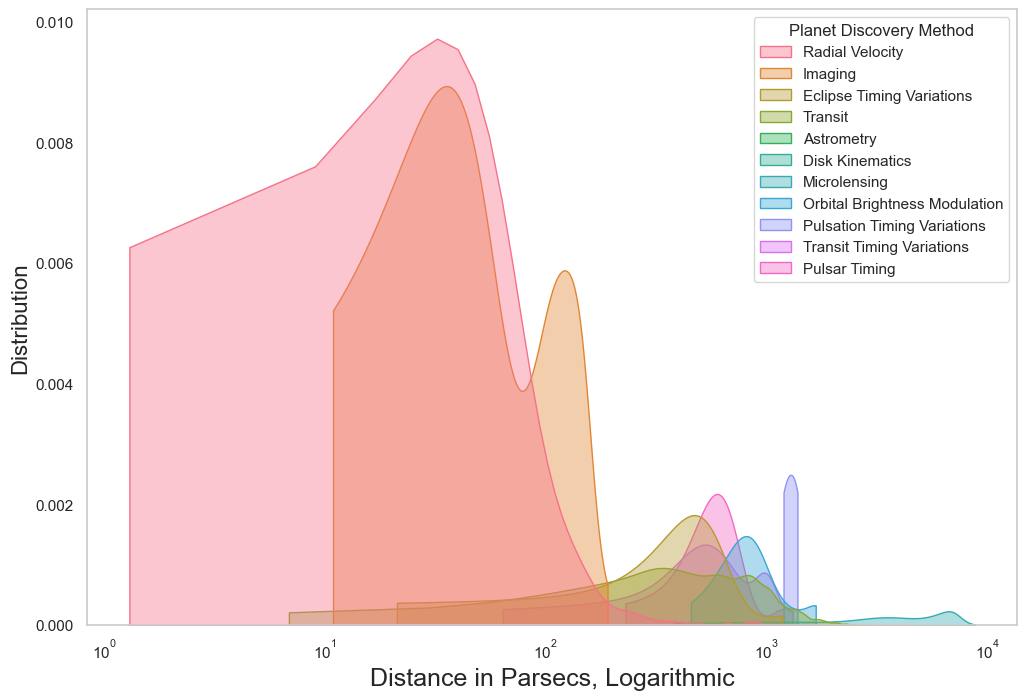

In [86]:
# Create a chart showing the distribution of exoplanet distances for each method of discovery

# Set the style
sns.set_theme(style="whitegrid")

# Set figure size for the notebook
plt.rcParams["figure.figsize"]=12,8

# set seaborn whitegrid theme and color palatte
sns.set_style("whitegrid", {'axes.grid' : False})
sns.color_palette("cubehelix", as_cmap=True)

g = sns.kdeplot(data=df, x="sy_dist", hue="discoverymethod", cut=0, fill=True, common_norm=False, alpha=0.4,)

plt.xlabel('Distance in Parsecs, Logarithmic', fontsize=18)
plt.ylabel('Distribution', fontsize=16)

handles = g.legend_.legendHandles
for h, t in zip(handles, g.legend_.texts):
    h.set_label(t.get_text())  # assign the legend labels to the handles
g.legend(title="Planet Discovery Method", handles=handles, loc="upper right")

# Make the x axis logarithmic
plt.xscale('log')

/Users/ramundson/.pyenv/versions/3.10.2/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
/Users/ramundson/.pyenv/versions/3.10.2/lib/python3.10/site-packages/seaborn/axisgrid.py:848: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
/Users/ramundson/.pyenv/versions/3.10.2/lib/python3.10/site-packages/seaborn/axisgrid.py:848: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
/Users/ramundson/.pyenv/versions/3.10.2/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
/Users/ramundson/.pyenv/versions/3.10.2/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_l

KeyError: "None of [Index(['x'], dtype='object')] are in the [columns]"

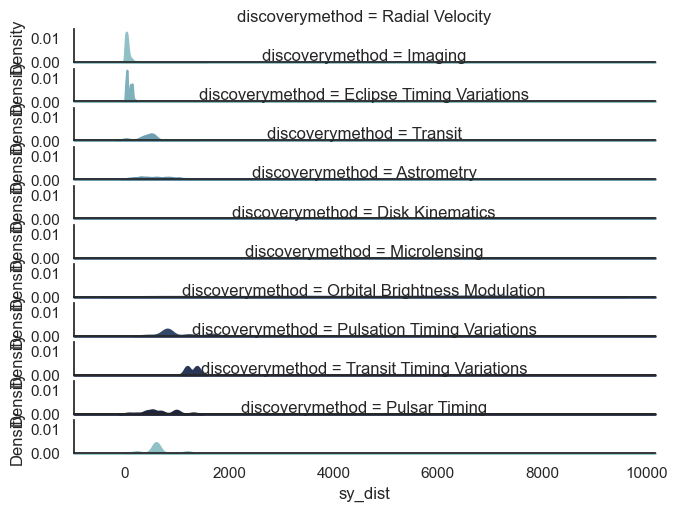

In [99]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Create the data
#rs = np.random.RandomState(1979)
#x = rs.randn(500)
#g = np.tile(list("ABCDEFGHIJ"), 50)
#df = pd.DataFrame(dict(x=x, g=g))
#m = df.discoverymethod.map(ord)
#df["x"] += m

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(df, row="discoverymethod", hue="discoverymethod", aspect=15, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, "sy_dist",
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, linewidth=1.5)
#g.map(sns.kdeplot, "sy_dist", clip_on=False, color="w", lw=2, bw_adjust=.5)

# passing color=None to refline() uses the hue mapping
g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


#g.map(label, "x")

# Set the subplots to overlap
g.figure.subplots_adjust(hspace=-.25)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[], ylabel="")
g.despine(bottom=True, left=True)